# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 8 # 5 increase n 
label_name = "stat8"
layers = [2] #[7, 2]

epochs = 1000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 263.69162853062153
Epoch 1, Loss 207.9895337820053
Epoch 2, Loss 182.74287468194962
Epoch 3, Loss 175.6413460969925
Epoch 4, Loss 172.86935433745384
Epoch 5, Loss 161.05213350057602
Epoch 6, Loss 163.82631047815084
Epoch 7, Loss 159.67475199699402
Epoch 8, Loss 157.99015800654888
Epoch 9, Loss 160.56719858199358
Epoch 10, Loss 157.58006374537945
Epoch 11, Loss 158.71229645609856
Epoch 12, Loss 159.68640282005072
Epoch 13, Loss 154.72026017308235
Epoch 14, Loss 151.34354655444622
Epoch 15, Loss 154.09605287760496
Epoch 16, Loss 157.04236514866352
Epoch 17, Loss 156.86571635305882
Epoch 18, Loss 154.08307245373726
Epoch 19, Loss 157.72744939476252
Epoch 20, Loss 153.4329294525087
Epoch 21, Loss 149.9068942144513
Epoch 22, Loss 154.6027191132307
Epoch 23, Loss 150.54948994517326
Epoch 24, Loss 150.01240278035402
Epoch 25, Loss 152.89297727495432
Epoch 26, Loss 155.04484356939793
Epoch 27, Loss 154.99390318244696
Epoch 28, Loss 151.76314236596227
Epoch 29, Loss 156.0355040580

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

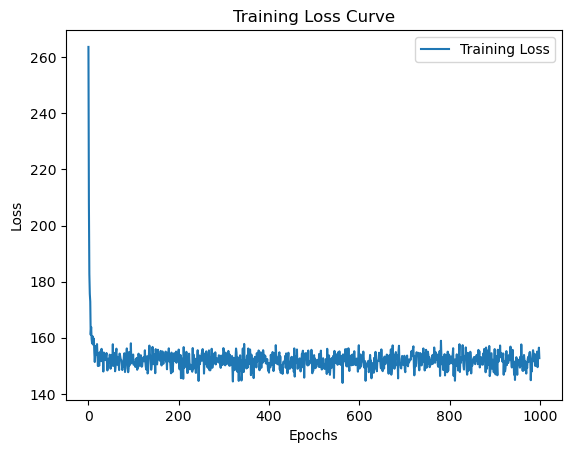

In [5]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[29801, 2259], [58, 138]]
Accuracy for class 0 = 92.95383655645665%
Accuracy for class 1 = 70.40816326530613%
Overall accuracy = 92.81684027777777%


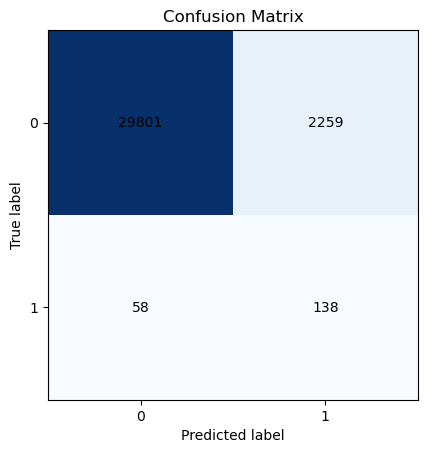

In [6]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

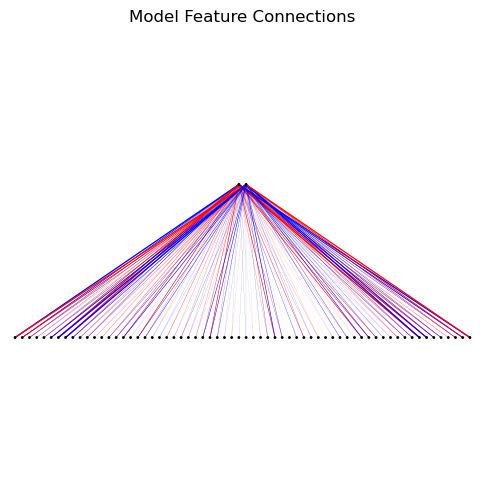

In [7]:
model.plot_connections()

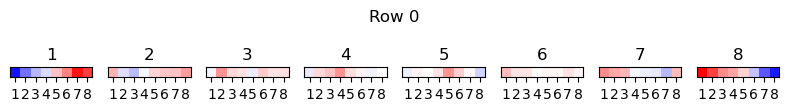

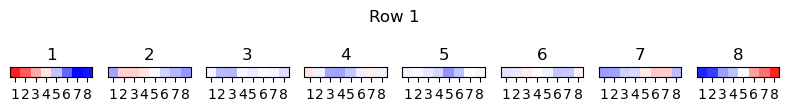

In [8]:
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)

In [9]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)

In [10]:
import pandas as pd

# Load the dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
data = pd.read_csv(file_path)

# Convert permutation strings to tuples
data['permutation'] = data['permutation'].apply(eval)

# Function to calculate run lengths
def calculate_run_lengths(perm):
    run_lengths = []
    current_run_length = 1
    n = len(perm)
    for i in range(1, n):
        if perm[i] == perm[i - 1] + 1:
            current_run_length += 1
        else:
            run_lengths.append(current_run_length)
            current_run_length = 1
    run_lengths.append(current_run_length)
    return run_lengths

# Calculate run length measure for all data
data['run_lengths'] = data['permutation'].apply(calculate_run_lengths)

# Function to check if the longest run length exceeds a threshold
def longest_run_exceeds_threshold(run_lengths, threshold=5):
    return max(run_lengths) > threshold

# Apply the threshold test to the dataset
data['stat8_predicted'] = data['run_lengths'].apply(longest_run_exceeds_threshold, threshold=5).astype(int)

# Calculate accuracy
accuracy = (data['stat8'] == data['stat8_predicted']).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9940476190476191
